# Photo-Realistic Style Transfer

In [1]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [2]:
from src.transfer_style import Stylizer
from src.optimizers import GradientDescent, L_BFGS, Adam
from src.callback import Callback

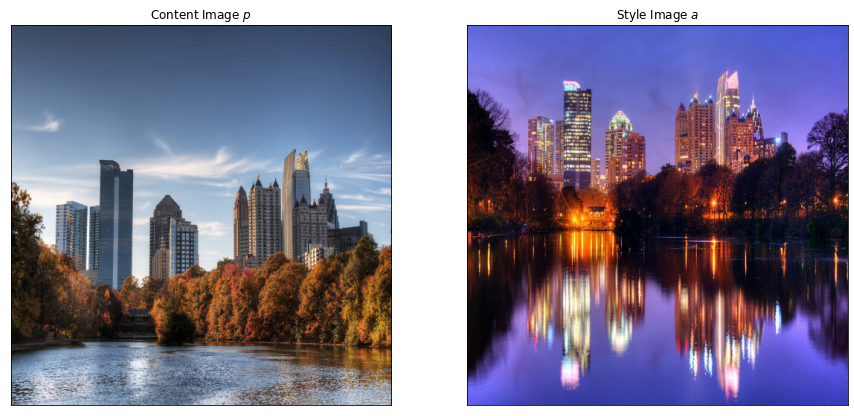

In [3]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
content = io.imread('img/content/piedmont-park.jpg')
content = T.resize(content, (512, 512), preserve_range=True).astype('uint8')
io.imsave('img/photo-realistic-style-transfer/content.jpg', content)
ax = plt.imshow(content)
plt.title('Content Image $p$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.subplot(1, 2, 2)
style = io.imread('img/content/piedmont-park-night.jpg')
style = T.resize(style, content.shape[:-1], preserve_range=True).astype('uint8')
io.imsave('img/photo-realistic-style-transfer/style.jpg', style)
ax = plt.imshow(style)
plt.title('Style Image $a$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

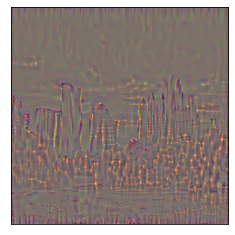

100%|██████████| 100/100 [00:34<00:00,  2.92it/s]


In [4]:
output = Stylizer('block3_conv2', content_weight=1, style_weight=100)(
    content=content,
    style=style,
    optimize=GradientDescent(learning_rate=1e-5),
    iterations=100,
    callback=Callback('build/photo-realistic-style-transfer/GradientDescent')
)
io.imsave('img/photo-realistic-style-transfer/piedmont-park-SGD.jpg', output)

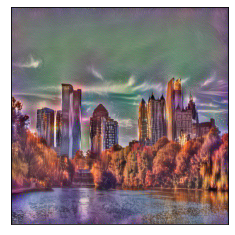

100%|██████████| 150/150 [00:43<00:00,  3.44it/s]


In [5]:
output = Stylizer('block3_conv2', content_weight=1, style_weight=100)(
    content=content,
    style=style,
    optimize=Adam(learning_rate=1e2),
    iterations=150,
    callback=Callback('build/photo-realistic-style-transfer/Adam')
)
io.imsave('img/photo-realistic-style-transfer/piedmont-park-Adam.jpg', output)

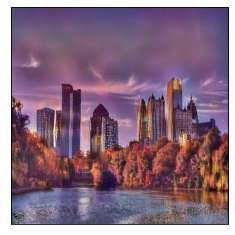

100%|██████████| 50/50 [05:07<00:00,  6.15s/it]


In [6]:
output = Stylizer('block3_conv2', content_weight=1, style_weight=100)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=50,
    callback=Callback('build/photo-realistic-style-transfer/L_BFGS')
)
io.imsave('img/photo-realistic-style-transfer/piedmont-park-L_BFGS.jpg', output)